In [1]:
# Creating Statistical parsing tree using CFG

import nltk
from nltk import CFG

grammar = CFG.fromstring("""
    S -> NP VP
    NP -> Det N
    VP -> V
    Det -> 'The'
    N -> 'cat'
    V -> 'sleeps'
""")

parser = nltk.ChartParser(grammar)

sentence = ["The", "cat", "sleeps"]

for tree in parser.parse(sentence):
    tree.pretty_print()

         S        
      ___|____     
     NP       VP  
  ___|___     |    
Det      N    V   
 |       |    |    
The     cat sleeps



In [2]:
# Now PCFG with probabilities

from nltk import PCFG

grammar = PCFG.fromstring("""
    S -> NP VP [1.0]
    NP -> Det N [0.9] | Name [0.1]
    VP -> V [0.5] | V NP [0.5]
    Det -> 'The' [1.0]
    N -> 'cat' [0.5] | 'dog' [0.5]
    V -> 'sleeps' [0.5] | 'barks' [0.5]
    Name -> 'John' [1.0]
""")

parser = nltk.ViterbiParser(grammar)

sentence = ["The", "cat", "sleeps"]

for tree in parser.parse(sentence):
    tree.pretty_print()

         S        
      ___|____     
     NP       VP  
  ___|___     |    
Det      N    V   
 |       |    |    
The     cat sleeps



In [3]:
# Text cataforization: Patttern based using re

import re

rules  = {

    'business': r'\b(company|market|stock|profit|revenue|economy)\b',

    'education': r'\b(school student|university|curriculum|exam)\b',

    'entertainment': r'\b(movie|music|film|actor|show|drama)\b',

    'sports': r'\b(game|match|team|tournament|score|goal)\b',

    'technology': r'\b(technology|AI|software|computer|gadget|device)\b'
}

def rule_based_predict(text):

    for category, pattern in rules.items():

        if re.search(pattern, text.lower()):

            return category

    return 'unknown'

new_descriptions = [

    "The company reported a significant increase in quarterly profits.",

    "A new curriculum will be introduced in all state schools.",

    "The latest movie release has broken all box office records.",

    "The football team secured a last-minute victory in the finals.",

    "Innovations in AI are changing the face of the tech industry."
]


print("Rule-based prediction for new news stories : ")

for desc in new_descriptions:

    pred = rule_based_predict(desc)

    print(f"Description: {desc}")

    print(f"Predicted Category: {pred}\n")

Rule-based prediction for new news stories : 
Description: The company reported a significant increase in quarterly profits.
Predicted Category: business

Description: A new curriculum will be introduced in all state schools.
Predicted Category: education

Description: The latest movie release has broken all box office records.
Predicted Category: entertainment

Description: The football team secured a last-minute victory in the finals.
Predicted Category: sports

Description: Innovations in AI are changing the face of the tech industry.
Predicted Category: unknown



In [4]:
# Text catagorization using naive bayes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, classification_report, confusion_matrix


In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd # Import pandas

# Set the path to the files you'd like to load
file_paths = [
    "business_data.csv",
    "education_data.csv",
    "entertainment_data.csv",
    "sports_data.csv",
    "technology_data.csv"
]

# Create a dictionary to store individual DataFrames
dfs = {}

# Load each file individually and store the DataFrame in the dictionary
for file_path in file_paths:
    # Load the latest version for each file
    df_single = kagglehub.load_dataset(
      KaggleDatasetAdapter.PANDAS,
      "banuprakashv/news-articles-classification-dataset-for-nlp-and-ml",
      file_path, # Pass a single file path (string)
      # Provide any additional arguments like
      # sql_query or pandas_kwargs. See the
      # documenation for more information:
      # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
    )
    # Store the DataFrame in the dictionary using the filename as the key
    dfs[file_path] = df_single

# Now you can access each DataFrame using its filename as the key
# For example, to access the business data:
# business_df = dfs["business_data.csv"]

# You can print the head of each DataFrame to verify
print("First 5 records of each DataFrame:")
for file_path, df in dfs.items():
    print(f"\n--- {file_path} ---")
    print(df.head())

<ipython-input-5-53a0f7fd357d>:22: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_single = kagglehub.load_dataset(
<ipython-input-5-53a0f7fd357d>:22: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_single = kagglehub.load_dataset(
<ipython-input-5-53a0f7fd357d>:22: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_single = kagglehub.load_dataset(
<ipython-input-5-53a0f7fd357d>:22: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_single = kagglehub.load_dataset(
<ipython-input-5-53a0f7fd357d>:22: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df_single = kagglehub.load_dataset(


First 5 records of each DataFrame:

--- business_data.csv ---
                                           headlines  \
0  Nirmala Sitharaman to equal Morarji Desai’s re...   
1  ‘Will densify network, want to be at least no....   
2  Air India group to induct an aircraft every si...   
3  Red Sea woes: Exporters seek increased credit ...   
4  Air India group to induct a plane every 6 days...   

                                         description  \
0  With the presentation of the interim budget on...   
1  'In terms of market share, we aim to double it...   
2  Air India currently has 117 operational aircra...   
3  Rising attacks forced shippers to consider the...   
4  Apart from fleet expansion, 2024 will also see...   

                                             content  \
0  Sitharaman, the first full-time woman finance ...   
1  The merger of Tata group’s budget airlines Air...   
2  The Air India group plans to induct one aircra...   
3  Indian exporters have asked the centr

In [6]:
dfs

{'business_data.csv':                                               headlines  \
 0     Nirmala Sitharaman to equal Morarji Desai’s re...   
 1     ‘Will densify network, want to be at least no....   
 2     Air India group to induct an aircraft every si...   
 3     Red Sea woes: Exporters seek increased credit ...   
 4     Air India group to induct a plane every 6 days...   
 ...                                                 ...   
 1995  Two official teams from India, EU to discuss c...   
 1996  Adani family sells $1 billion stake to GQG, ot...   
 1997  Housing sales up 8% in April-June period acros...   
 1998  Spike in tomato prices temporary; rates will c...   
 1999  Benchmark indices touch new highs: Sensex cros...   
 
                                             description  \
 0     With the presentation of the interim budget on...   
 1     'In terms of market share, we aim to double it...   
 2     Air India currently has 117 operational aircra...   
 3     Rising att

In [7]:
files = {
    "business_data.csv":'business',
    "education_data.csv":'education',
    "entertainment_data.csv":'entertainment',
    "sports_data.csv":'sports',
    "technology_data.csv":'technology'
}

In [8]:
# all_data = []

# for files, category in files.items():
#     df = pd.read_csv(files)
#     df = df[['description']].dropna()
#     df['category'] = category
#     all_data.append(df)

# data = pd.concat(all_data, ignore_index=True)

In [9]:
data = pd.concat(dfs, ignore_index=True)

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(data['description'])

y = data['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB()

In [11]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

               precision    recall  f1-score   support

     business       0.89      0.91      0.90       410
    education       0.96      0.92      0.94       393
entertainment       0.96      0.96      0.96       395
       sports       0.94      0.95      0.95       415
   technology       0.90      0.90      0.90       387

     accuracy                           0.93      2000
    macro avg       0.93      0.93      0.93      2000
 weighted avg       0.93      0.93      0.93      2000



In [12]:
y_test_sample = y_test[:25].reset_index(drop=True)

y_pred_sample = y_pred[:25]

for i in range(len(y_test_sample)):

    print(f"{i+1}. Actual : {y_test_sample[i]:<15}  Predicted : {y_pred_sample[i]}")



1. Actual : sports           Predicted : sports
2. Actual : entertainment    Predicted : entertainment
3. Actual : business         Predicted : business
4. Actual : entertainment    Predicted : entertainment
5. Actual : entertainment    Predicted : entertainment
6. Actual : sports           Predicted : sports
7. Actual : business         Predicted : business
8. Actual : entertainment    Predicted : entertainment
9. Actual : sports           Predicted : sports
10. Actual : business         Predicted : business
11. Actual : education        Predicted : education
12. Actual : sports           Predicted : business
13. Actual : entertainment    Predicted : entertainment
14. Actual : entertainment    Predicted : entertainment
15. Actual : education        Predicted : education
16. Actual : sports           Predicted : sports
17. Actual : business         Predicted : technology
18. Actual : technology       Predicted : technology
19. Actual : sports           Predicted : sports
20. Actual : t

In [13]:
files = {
    "business_data.csv":'business',
    "education_data.csv":'education',
    "entertainment_data.csv":'entertainment',
    "sports_data.csv":'sports',
    "technology_data.csv":'technology'
}

cm = confusion_matrix(y_test, y_pred, labels = list(files.values()))

print(pd.DataFrame(cm, index=files.values(), columns=files.values()))

               business  education  entertainment  sports  technology
business            372          9              4       5          20
education            13        362              0       8          10
entertainment         3          0            378       9           5
sports                4          0             11     396           4
technology           26          5              2       4         350


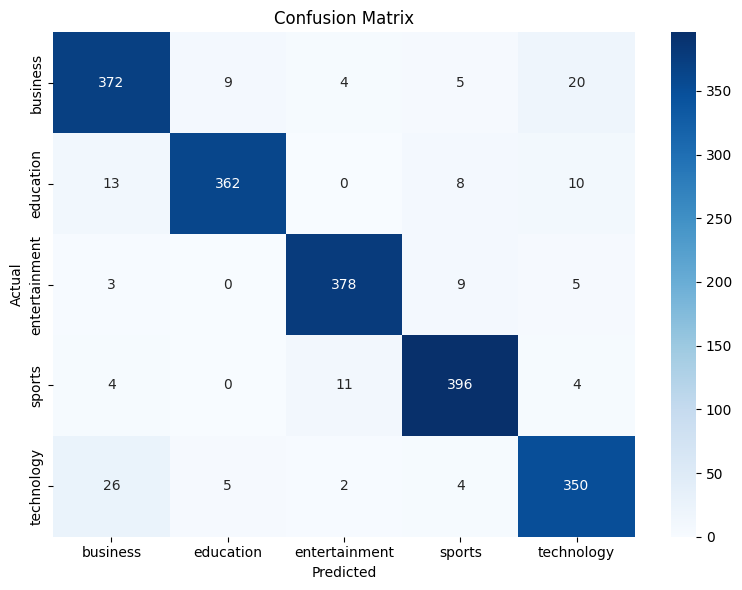

In [14]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=files.values(), yticklabels=files.values())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [15]:
#predict on 5 new unseen news description
new_descriptions = [
    "The company reported a significant increase in quaterly profits.",
    "A new curriculum will be introduced in all state schools.",
    "The latest movie release has broken all box office records.",
    "The football team secured a last-minute victory in the finals.",
    "Innovations in AI are changing the face of the tech industry."
]

new_X = vectorizer.transform(new_descriptions)

new_pred = model.predict(new_X)

for desc, pred in zip(new_descriptions, new_pred):
    print(f"Description: {desc} ----> Predicted Category: {pred}\n")

Description: The company reported a significant increase in quaterly profits. ----> Predicted Category: business

Description: A new curriculum will be introduced in all state schools. ----> Predicted Category: education

Description: The latest movie release has broken all box office records. ----> Predicted Category: entertainment

Description: The football team secured a last-minute victory in the finals. ----> Predicted Category: sports

Description: Innovations in AI are changing the face of the tech industry. ----> Predicted Category: technology



In [16]:
# Centroid based classificaton uing eclidean disrttnace concept

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

texts = ["I love this product1", "This is terible.", "Absolutely amazing","Not good at all"]

labels = ["positive","negative","positive","negative"]

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(texts)

class_centroids = {}
unique_label = set(labels)

for label in unique_label:

    class_indices = [i for i, lbl in enumerate(labels) if lbl == label]

    class_vectors = X[class_indices].toarray()

    class_centroids[label] = np.mean(class_vectors, axis=0)

new_text = ['This product is amazing!']

new_vector = vectorizer.transform(new_text).toarray()

distances = {
    label: euclidean_distances([centroid], new_vector)[0][0]
    for label, centroid in class_centroids.items()
}

predicted_label = min(distances, key=distances.get)

for label, centroid in class_centroids.items():

    print(f"\nCentroid for class '{label}' : \n{centroid}")

print(f"\nDistance from new text to centroids : \n{distances}")

print(f"\nPredicted label : {predicted_label}")




Centroid for class 'negative' : 
[0.         0.25       0.         0.25       0.25       0.30880719
 0.         0.25       0.         0.30880719 0.24346713]

Centroid for class 'positive' : 
[0.35355339 0.         0.35355339 0.         0.         0.
 0.30880719 0.         0.30880719 0.         0.24346713]

Distance from new text to centroids : 
{'negative': np.float64(0.9388543610356126), 'positive': np.float64(0.9089420842914385)}

Predicted label : positive


In [17]:
# Centroid based classificaton using cosine similarity

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

texts = ["I love this product1", "This is terible.", "Absolutely amazing","Not good at all"]

labels = ["positive","negative","positive","negative"]

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(texts)

class_centroids = {}
unique_label = set(labels)

for label in unique_label:

    class_indices = [i for i, lbl in enumerate(labels) if lbl == label]

    class_vectors = X[class_indices].toarray()

    class_centroids[label] = np.mean(class_vectors, axis=0)

new_text = ['This product is amazing!']

new_vector = vectorizer.transform(new_text).toarray()

similarities = {
    label: cosine_similarity([centroid], new_vector)[0][0]
    for label, centroid in class_centroids.items()
}

predicted_label = max(distances, key=distances.get)

for label, centroid in class_centroids.items():

    print(f"\nCentroid for class '{label}' : \n{centroid}")

print(f"\nCosine similarities from new text to centroids : \n{distances}")

print(f"\nPredicted label : {predicted_label}")




Centroid for class 'negative' : 
[0.         0.25       0.         0.25       0.25       0.30880719
 0.         0.25       0.         0.30880719 0.24346713]

Centroid for class 'positive' : 
[0.35355339 0.         0.35355339 0.         0.         0.
 0.30880719 0.         0.30880719 0.         0.24346713]

Cosine similarities from new text to centroids : 
{'negative': np.float64(0.9388543610356126), 'positive': np.float64(0.9089420842914385)}

Predicted label : negative


In [18]:
# Lexicon using nltk corpora

import nltk
from nltk.corpus import wordnet, framenet as fn
from nltk.corpus import propbank
from nltk.corpus.reader.verbnet import VerbnetCorpusReader

nltk.download('wordnet')
nltk.download('framenet_v17')
nltk.download('propbank')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package framenet_v17 to /root/nltk_data...
[nltk_data]   Package framenet_v17 is already up-to-date!
[nltk_data] Downloading package propbank to /root/nltk_data...
[nltk_data]   Package propbank is already up-to-date!


True

In [19]:
print("Wordnet example : ")

synonyms = wordnet.synsets('happy')

print("Synonyms  : ", [lemma.name() for synset in synonyms for lemma in synset.lemmas()])

Wordnet example : 
Synonyms  :  ['happy', 'felicitous', 'happy', 'glad', 'happy', 'happy', 'well-chosen']


In [20]:
antonyms = []

for syn in wordnet.synsets('happy'):

    for lemma in syn.lemmas():

        if lemma.antonyms():

            antonyms.append(lemma.antonyms()[0].name())

print("Antonyms : ", antonyms)

Antonyms :  ['unhappy']


In [21]:
# Framenet :Retriving Frames for "happy"

print("\nFrameNet Examples : ")

frames = fn.frames_by_lemma("happy")

if frames:

    for frame in frames[:3]:

        print(f"Frame Name: {frame.name}")

        print(f"Frame Definition: {frame.definition}")

else:

    print("No frames found for 'happy'")


FrameNet Examples : 
Frame Name: Emotion_directed
Frame Definition: The adjectives and nouns in this frame describe an Experiencer who is feeling or experiencing a particular emotional response to a Stimulus or about a Topic.  There can also be a Circumstances under which the response occurs or a Reason that the Stimulus evokes the particular response in the Experiencer.  'Mr. Whiskers is upset that there are no more cat treats.' 'The furious parent stormed into the office.' 'Franz gets infuriated at the thought of his ex-wife remarried.' ' She flashed a jubilant smile.' 
Frame Name: Luck
Frame Definition: A State_of_affairs is evaluated as good (or bad), against a background assumption that previously, the State_of_affairs was thought to be unlikely to occur. The State_of_affairs holds for a particular Protagonist.  'He is a lucky gambler.'


In [22]:
# PropBank: Rolesets : Result in XML , need to parse it

print("\nPropBank Examples : ")

try:

    rolesets = propbank.rolesets()

    for roleset in rolesets[:3]:

        roleset_id = roleset.attrib.get('id','N/A')

        print(f"Roleset ID : {roleset_id}")

        roles = roleset.findall('roles/role')

        for role in roles:

            n = role.attrib.get('n','?')

            dscr = role.attrib.get('dscr','')

            print(f" Arg{n} : {dscr}")

    if propbank.instances():

        print("\nFiltering instances of specific verb.....")

        target_verb = "run"

        instances = propbank.instances()

        filtered = [inst for inst in instances if inst.roleset.startswith(f"{target_verb}.")]

        print(f"\nFound {len(filtered)} instances for verb '{target_verb}'")

        for inst in filtered[:2]:

            print(f"Sentence ID : {inst.fileid}, Roleset : {inst.roleset}")

except Exception as e:

    print(f"An error occurred :")


PropBank Examples : 
Roleset ID : abandon.01
 Arg0 : 
 Arg1 : 
 Arg2 : 
Roleset ID : abandon.02
 Arg0 : 
 Arg1 : 
 Arg2 : 
Roleset ID : abandon.03
 Arg0 : 
 Arg1 : 
 Arg2 : 

Filtering instances of specific verb.....

Found 374 instances for verb 'run'
Sentence ID : wsj_0027.mrg, Roleset : run.01
Sentence ID : wsj_0034.mrg, Roleset : run.05


In [23]:
!pip install pyspellchecker

In [24]:
from spellchecker import SpellChecker
import nltk
from nltk.corpus import wordnet

nltk.download('wordnet')
nltk.download('omw-1.4')

spell = SpellChecker()

words = ['speling','correct','misteak']

misspelled = spell.unknown(words)

print("Spell Check Correction : ")

for word in misspelled:

    print(f" - Original : {word}")
    print(f"   Best Suggestion : {spell.correction(word)}")
    print(f"   Other candidates : {spell.candidates(word)}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Spell Check Correction : 
 - Original : speling
   Best Suggestion : spelling
   Other candidates : {'spewing', 'seeling', 'spelling', 'spieling'}
 - Original : misteak
   Best Suggestion : mistake
   Other candidates : {'mister', 'mishear', 'misters', 'mistook', 'misted', 'misdeal', 'mistral', 'mistreat', 'mistake', 'misteach', 'misspeak', 'mislead', 'steak', 'misread'}


In [25]:
# Example sentence of a word

word ="happy"

synonyms = wordnet.synsets(word)

print("\nExample sentence : ")

for example in synonyms[0].examples():

    print(f" - {example}")


Example sentence : 
 - a happy smile
 - spent many happy days on the beach
 - a happy marriage


In [26]:
!pip install indic-transliteration

In [29]:
# Transliteration

from indic_transliteration import sanscript

from indic_transliteration.sanscript import transliterate

texts = {

    "Hindi": "नमस्ते दुनिया",

    "Bengali": "নমস্কার বিশ্ব",

    "Tamil": "வணக்கம் உலகம்",

    "Telugu": "నమస్తే ప్రపంచం",

    "Marathi": "नमस्कार जगा",

    "Kannada": "ನಮಸ್ಕಾರ ಜಗತ್ತು"
}

# Map language name to the correct script constant in sanscript

lang_to_script = {

    "Hindi": sanscript.DEVANAGARI,

    "Bengali": sanscript.BENGALI,

    "Tamil": sanscript.TAMIL,

    "Telugu": sanscript.TELUGU,

    "Marathi": sanscript.DEVANAGARI,

    "Kannada": sanscript.KANNADA
}

for lang, text in texts.items():

    src_scripts = lang_to_script[lang]

    itrans = transliterate(text, src_scripts, sanscript.ITRANS)

    iast = transliterate(text, src_scripts, sanscript.IAST)

    print(f" {lang} : {text}")
    print(f" ITRANS : {itrans}")
    print(f" IAST : {iast}")
    print()

 Hindi : नमस्ते दुनिया
 ITRANS : namaste duniyA
 IAST : namaste duniyā

 Bengali : নমস্কার বিশ্ব
 ITRANS : namaskAra vishva
 IAST : namaskāra viśva

 Tamil : வணக்கம் உலகம்
 ITRANS : vaNaghghaM ulaghaM
 IAST : vaṇaghghaṃ ulaghaṃ

 Telugu : నమస్తే ప్రపంచం
 ITRANS : namaste prapaMchaM
 IAST : namaste prapaṃcaṃ

 Marathi : नमस्कार जगा
 ITRANS : namaskAra jagA
 IAST : namaskāra jagā

 Kannada : ನಮಸ್ಕಾರ ಜಗತ್ತು
 ITRANS : namaskAra jagattu
 IAST : namaskāra jagattu



In [30]:
!pip install language_tool_python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 5.6 MB/s eta 0:00:00


In [32]:
!sudo apt update
!sudo apt install openjdk-17-jdk -y
!java -version

Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,759 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,740 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-s

In [33]:
# Grammar Check

import language_tool_python

tool = language_tool_python.LanguageTool("en")

text = "I come to C-DAC everyday."

matches = tool.check(text)

for match in matches:

    print(f"Issue : {match.message}")
    print(f"Suggested correction : {match.replacements}")

INFO:language_tool_python.download_lt:Unzipping /tmp/tmphdp2j8a8.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://internal1.languagetool.org/snapshots/LanguageTool-latest-snapshot.zip to /root/.cache/language_tool_python.


Issue : ‘Everyday’ is an adjective. Did you mean “every day”?
Suggested correction : ['every day']


In [34]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 22.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [35]:
# Text auto completion

from transformers import pipeline

generator = pipeline("text-generation", model = "gpt2")

def autocomplete(prompt, max_length = 50):

    result = generator(prompt, max_length = max_length, num_return_sequences = 1, temperature=0.7, top_k = 50, pad_token_id = 50256)

    print(result)

    return result[0]['generated_text']


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [36]:
prompt = "The difference between human inteligence and AI"

print("Auto complete : ", autocomplete(prompt))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "The difference between human inteligence and AI is that the latter is capable of generating intelligence in a way that's not being detected by any human intelligence test.\n\nNot all artificial intelligence is created equal, but we're not talking about all.\n\nIf we take the example of intelligent robots that have an ability to understand the way humans interact with information, and they are able to do that just by looking at it, and they can understand it, and they can make decisions based on that, then AI could be a pretty good substitute for human intelligence.\n\nTo me, there are two problems with this.\n\nFirst, we will talk about the human-to-AI gap.\n\nThis is a long-term problem. The human-to-AI gap is going to grow substantially in the next century, and this is not a new problem. The problem is that people are already moving into other fields, such as computers, where people are already starting to be able to do that.\n\nI believe that the human-to-AI gap

In [37]:
prompt = "Machine learning is "

print("Auto complete : ", autocomplete(prompt))

Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': "Machine learning is \xa0one of the most exciting areas of AI research.\nIn this article, I'll discuss the best way to develop and test deep learning frameworks like ML and Scala.\nI'll start by covering the core functionality of deep learning frameworks like ML, Scala, MLM and Closure.\nI'll cover what they are, how to use them and how to develop them. Then I'll show you how to install them on your system using pip install deeplearning.\nI'll then show you how to run them live using pip install deeplearning.\nThe code below will create a new python script that will perform deep learning tests using the API of the ML framework.\nYou can run the script from a web browser like Chrome, Firefox, Chrome OS and Safari.\nCode\nThe code below starts with a simple example:\nimport * as a2 from deeplearning import ML import * as a2 from deeplearning.models import * from deeplearning.learn_model import lambda as model from deeplearning.models.core import * from deeplearning.mo

In [38]:
prompt = " The future of AI is "

print("Auto complete : ", autocomplete(prompt))

Both `max_new_tokens` (=256) and `max_length`(=50) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


[{'generated_text': ' The future of AI is \xa0to use it as a tool to improve human abilities, not for the sake of it. \xa0We should look at it as a tool to make AI more efficient, not to make it more complex. \xa0This means that we should consider the possibility of AI becoming more complex. The current generation of CPUs and GPUs is not solving the problem of AI, but rather it is trying to solve it as a tool. \xa0The problem is that there are very few things that can be done with CPUs and GPUs that can efficiently solve the problem of AI. \xa0We should consider that there are also many ways that we can improve upon AI. \xa0For example, we can use more complex algorithms, and more complex algorithms would help us be more efficient. \xa0Another option is to reduce the complexity of our algorithms so that they are less expensive. \xa0This could be done by introducing more sophisticated algorithms, or we could reduce our complexity by making some of our algorithms more complex. \xa0This i

In [40]:
# domain identification

classifier = pipeline("zero-shot-classification", model = "facebook/bart-large-mnli")

text = "The new AI model surpasses human performance in language understanding."

candidate_labels = ["technology","sports", "finance","health","education"]

result = classifier(text, candidate_labels)

print(f"Predicted domain: {result['labels'][0]} (Confidence : {result['scores'][0]})")

Device set to use cpu


Predicted domain: technology (Confidence : 0.9874113202095032)


In [41]:
text = "I was feeling a bit lonely yesterday."

candidate_labels = ["psychology","medicine", "pharma","personal","family"]

result = classifier(text, candidate_labels)

print("Top 3 predicted domain : ")

for label, score in zip(result['labels'][:3], result['scores'][:3]):

    print(f"{label} (Confidence : {score})")

Top 3 predicted domain : 
personal (Confidence : 0.9429904222488403)
psychology (Confidence : 0.033702652901411057)
medicine (Confidence : 0.008746008388698101)


In [43]:
labels = ["male","female"]

texts = [
    "I love footbal and gaming.",
    "I enjoy shpping and fasgion.",
    "I work in the field of AI.",
    "I am a collage student.",
    "I am an AI trainer.",
    "I am a smartphone addict."
]

for text in texts:

    result = classifier(text, candidate_labels=labels)

    print(f"Text : {text} \nPredicted gender : {result['labels'][0]} (Confidence : {result['scores'][0]}\n")

Text : I love footbal and gaming. 
Predicted gender : male (Confidence : 0.7647190690040588

Text : I enjoy shpping and fasgion. 
Predicted gender : female (Confidence : 0.5809087753295898

Text : I work in the field of AI. 
Predicted gender : female (Confidence : 0.7784161567687988

Text : I am a collage student. 
Predicted gender : female (Confidence : 0.5977952480316162

Text : I am an AI trainer. 
Predicted gender : female (Confidence : 0.7123538255691528

Text : I am a smartphone addict. 
Predicted gender : male (Confidence : 0.8212586641311646

